# Average meal distribution using Monte Carlo Simulation

**Problem : What I usually eat?** 

If I know the probability of eating a meal tomorrow based on the type of meal eaten today, i can find out the percentage of every type of meal usually eaten by me.  Suppose I am 75 % likely to eat Chicken tomorrow if i ate beef today, so what percentage of my meals are beef? This can be done by monte carlo methods using weighted sampling and repeating the random choice of meal for a large number of times based on the set probabilities of each meal. We will make sure to use large number of samples so that our results are same as performing the simulation for infinite number of times. It is the basic idea behind monte carlo simulation.

Let's first import the required Python libraries.

In [165]:
import numpy as np
import pandas as pd
import math
import scipy
import matplotlib.pyplot as plt
import random
%matplotlib inline
plt.style.use('seaborn')

**dinner_matrix** is showing the probability of eating a particular meal tomorrow based on the meal eaten today. Rows represent 'meal eaten today' and columns represent 'probability of meal to be eaten tomorrow'.

     
|      |Beef  |Chickn|Vegies|
|------|------|------|------|
|  __Beef__|25%   |50%   | 25%  |
|__Chickn__|75%   |20%   | 5%   |
|__Vegies__|50%   |50%   | 0%   |

We are using keys as 0 for Beef, 1 for Chicken and 2 for Vegetables.

In [166]:
dinner_matrix  = [[.25, .5, .25],
                  [.75, .2, .05],
                  [.50, .5, 0.0]]

meal_options = [0, 1, 2]
starting_meal = np.random.choice(meal_options)

* We are creating a dictionary named 'meal_counter' to record the number of times a particular meal is consumed over the given number of simuations. Dictionary uses the keys assigned to each meal type.
* 'Beef_percentage_over_time' list records the overall percentage of beef eaten.

In [167]:
meal_counter = {0:0, 1:0, 2:0}
number_of_meals_to_simulate = 10000
beef_percentage_over_time = []
meal = starting_meal
meal_counter[meal] += 1

In [168]:
for sim_number in range(number_of_meals_to_simulate):
    meal = np.random.choice(meal_options, p = dinner_matrix[meal])
    meal_counter[meal] += 1
    beef_percentage_over_time.append(meal_counter[0]/(sim_number+1))

In [169]:
print(meal_counter)
print(beef_percentage_over_time[9555])

{0: 4810, 1: 3855, 2: 1336}
0.48116366680619505


In [170]:
meal_names = ['Beef', 'Chicken', 'Vegetables']
for key, value in meal_counter.items():
    print(meal_names[key] + ':' + '%.3f'%(value/(number_of_meals_to_simulate)*100))

Beef:48.100
Chicken:38.550
Vegetables:13.360


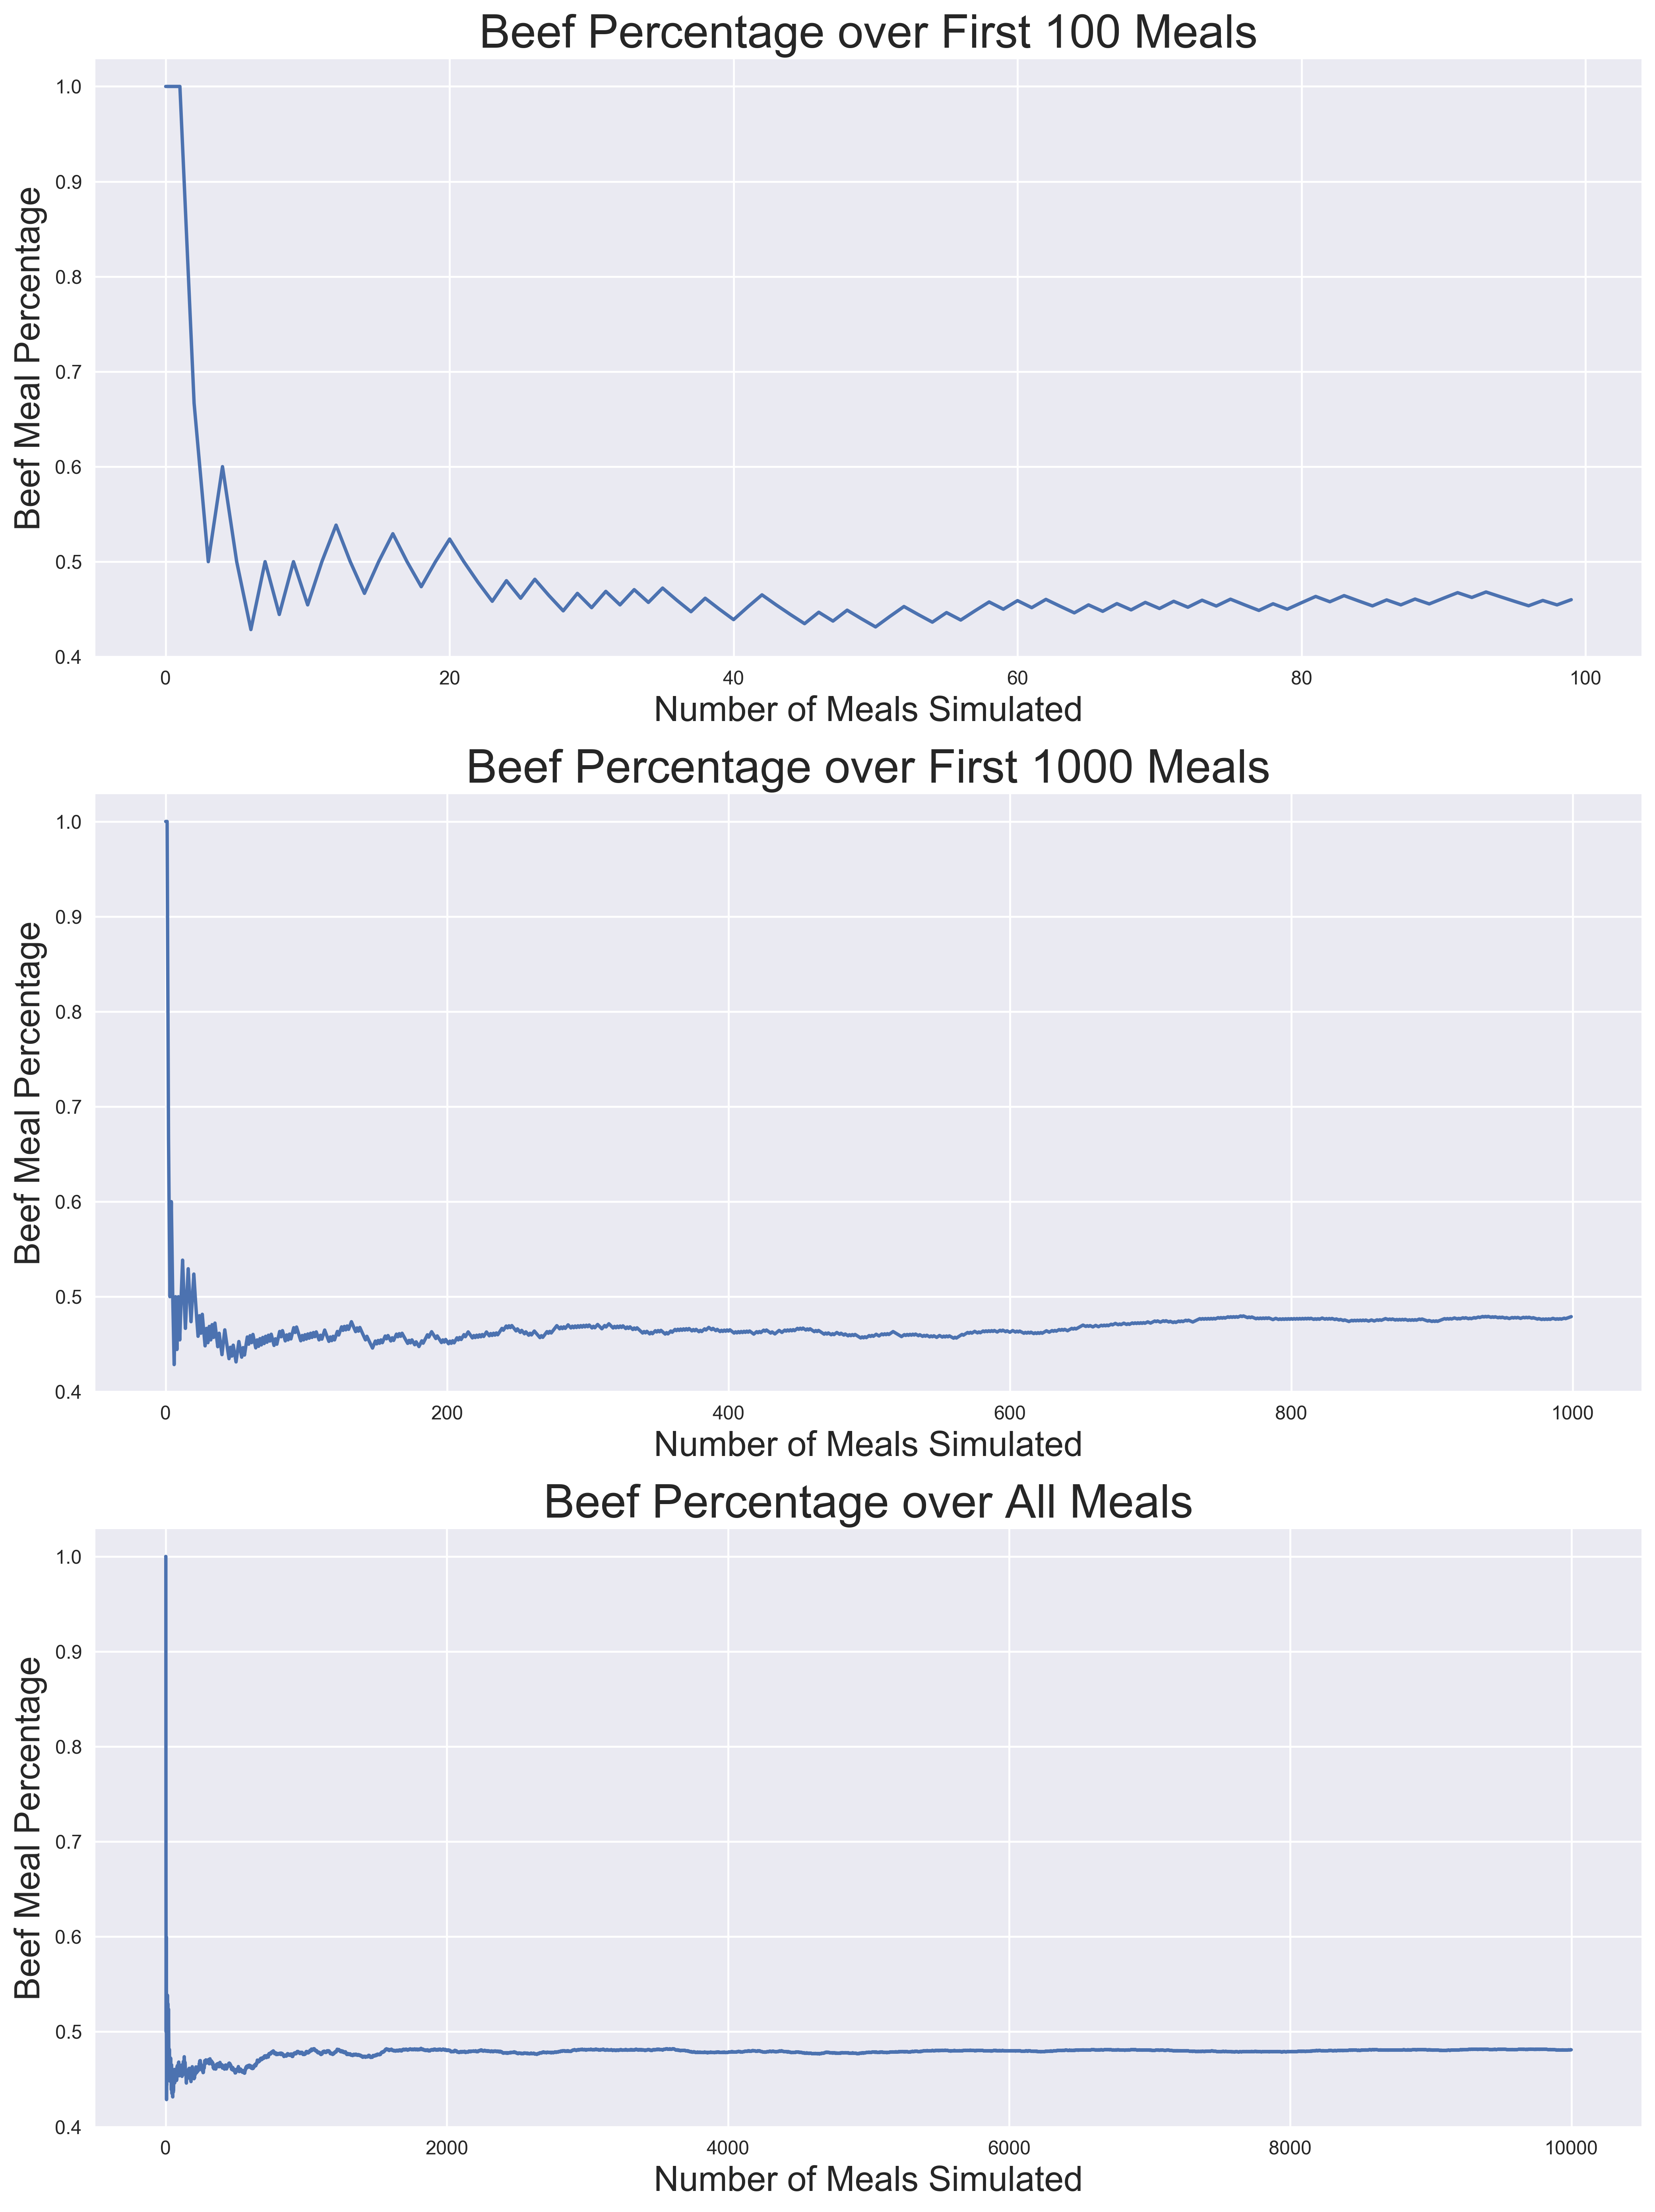

In [171]:
fig, ax = plt.subplots(3,1, dpi=350, figsize=(12,16))
ax[0].plot(range(number_of_meals_to_simulate)[:100], beef_percentage_over_time[:100])
ax[1].plot(range(number_of_meals_to_simulate)[:1000], beef_percentage_over_time[:1000])
ax[2].plot(range(number_of_meals_to_simulate), beef_percentage_over_time);
ax[0].set_title("Beef Percentage over First 100 Meals", fontsize=24);
ax[1].set_title("Beef Percentage over First 1000 Meals", fontsize=24);
ax[2].set_title("Beef Percentage over All Meals", fontsize=24);
ax[0].set_xlabel("Number of Meals Simulated", fontsize=18)
ax[1].set_xlabel("Number of Meals Simulated", fontsize=18)
ax[2].set_xlabel("Number of Meals Simulated", fontsize=18)
ax[0].set_ylabel("Beef Meal Percentage", fontsize=18)
ax[1].set_ylabel("Beef Meal Percentage", fontsize=18)
ax[2].set_ylabel("Beef Meal Percentage", fontsize=18)
plt.tight_layout()

This shows that as the number of simulations are increased, the outcome is more consistent and hence, close to the actual result. 

###Law of large numbers
Here we see that 'Law of large numbers' or 'Bernoulli's Law' is geeting into the picture which states that 'if the sample size is increased, the average of the outcome will be more close to the actual population average given that the sample is random and exhibit the same characteristics as of the total population and the tests are independent'. 

###Variance
Variance shows us how the outcomes are spread. In the above case when the meal sample size was 100, variance was high and as we increase the sample size, less variance is see.
Lets take an other example of 100 coin tosses. If we get 55 heads and 45 tails, variance is high and so we are less confident in estimation of a particular answer. On the other hand, if we get 85 heads and 15 tails, we are more confident as variance is less.
As a result, if variance grows we need to increase sample size.